In [1]:
import os, sys, copy, time
from datetime import datetime
from matplotlib.dates import date2num
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as get_data

In [2]:
# Fixing the date (before COVID)
b_start_date = '2019-07-01'
b_end_date = '2019-12-31'
# Fixing the date (during COVID)
a_start_date = '2020-01-01'
a_end_date = '2020-06-30'
nifty50_symbol = '^NSEI'

In [3]:
public_bank_return_b = pd.read_excel('./../data/task1_output.xlsx', sheet_name = 'public_bank_return_b')
public_bank_return_a = pd.read_excel('./../data/task1_output.xlsx', sheet_name = 'public_bank_return_a')
private_bank_return_b = pd.read_excel('./../data/task1_output.xlsx', sheet_name = 'private_bank_return_b')
private_bank_return_a = pd.read_excel('./../data/task1_output.xlsx', sheet_name = 'private_bank_return_a')

In [4]:
public_avg_return = np.concatenate((public_bank_return_b.apply(np.mean, axis = 1), public_bank_return_a.apply(np.mean, axis = 1)))
len(public_avg_return)

243

In [5]:
private_avg_return = np.concatenate((private_bank_return_b.apply(np.mean, axis = 1), private_bank_return_a.apply(np.mean, axis = 1)))
len(private_avg_return)

243

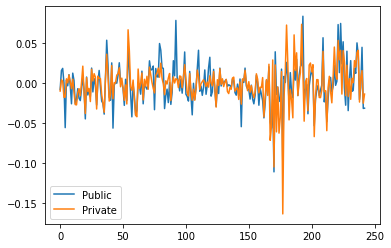

In [6]:
plt.plot(public_avg_return, label = 'Public')
plt.plot(private_avg_return, label = 'Private')
plt.legend();

In [7]:
nifty50_b =  pd.read_csv('./../data/nifty50_before_covid.csv')
nifty50_b_return = pd.DataFrame({'date': nifty50_b.Date[1:],
'return':nifty50_b['Close'].pct_change().drop(index = 0)})
nifty50_b_return['date'] = pd.to_datetime(nifty50_b_return['date'])

nifty50_a =  pd.read_csv('./../data/nifty50_after_covid.csv')
nifty50_a_return = pd.DataFrame({'date': nifty50_a.Date[1:],
'return':nifty50_a['Close'].pct_change().drop(index = 0)})
nifty50_a_return['date'] = pd.to_datetime(nifty50_a_return['date'])

nifty50_return = pd.concat([nifty50_b_return, nifty50_a_return])
nifty50_return = nifty50_return.iloc[1:,:]

In [8]:
return_df1 = pd.DataFrame({'date':nifty50_return['date'],'nifty50': nifty50_return['return'],
'public_avg':public_avg_return, 'private_avg':private_avg_return})
return_df1.set_index('date', inplace = True)
# return_df1

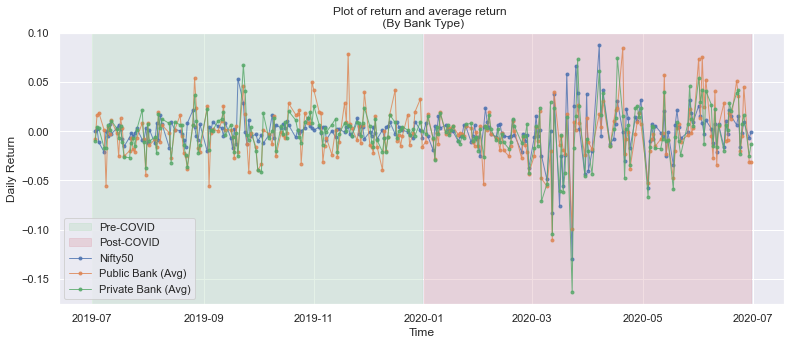

In [9]:
sns.set(rc={'figure.figsize':(13,5)})
# Start and end of the date range to extract
start, end = '2019-07-01', '2020-07-31'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.axvspan(date2num(datetime(2019,7,1)), date2num(datetime(2019,12,31)), label="Pre-COVID", color="#bddec5", alpha=0.4)
ax.axvspan(date2num(datetime(2020,1,1)), date2num(datetime(2020,6,30)), label="Post-COVID", color="#deadb8", alpha=0.4)
ax.plot(return_df1.loc[start:end, 'nifty50'], marker='.', linestyle='-', linewidth=1, label='Nifty50', alpha = 0.8)
ax.plot(return_df1.loc[start:end, 'public_avg'], marker='.', linestyle='-', linewidth=1, label='Public Bank (Avg)', alpha = 0.8)
ax.plot(return_df1.loc[start:end, 'private_avg'], marker='.', linestyle='-', linewidth=1, label='Private Bank (Avg)', alpha = 0.8)
ax.set_xlabel('Time')
ax.set_ylabel('Daily Return')
ax.set_title('Plot of return and average return \n (By Bank Type)')
plt.legend()
plt.savefig('./../img/plot/return_by_bank_type.png', dpi = 500, bbox_inches = 'tight')
plt.show()

In [10]:
bank_vulnerablity = pd.read_csv('./../data/banks_vulnerability.csv')
# bank_vulnerablity.head()

In [11]:
public_vul_sym = bank_vulnerablity['Symbol'][(bank_vulnerablity['Type']=='Public') & (bank_vulnerablity['vulnerable']==True)]
public_nonvul_sym = bank_vulnerablity['Symbol'][(bank_vulnerablity['Type']=='Public') & (bank_vulnerablity['vulnerable']==False)]
private_vul_sym = bank_vulnerablity['Symbol'][(bank_vulnerablity['Type']=='Private') & (bank_vulnerablity['vulnerable']==True)]
private_nonvul_sym = bank_vulnerablity['Symbol'][(bank_vulnerablity['Type']=='Private') & (bank_vulnerablity['vulnerable']==False)]

In [12]:
vul_return_b = pd.concat([public_bank_return_b[public_vul_sym], private_bank_return_b[private_vul_sym]], axis = 1)
vul_return_a = pd.concat([public_bank_return_a[public_vul_sym], private_bank_return_a[private_vul_sym]], axis = 1)
nonvul_return_b = pd.concat([public_bank_return_b[public_nonvul_sym], private_bank_return_b[private_nonvul_sym]], axis = 1)
nonvul_return_a = pd.concat([public_bank_return_a[public_nonvul_sym], private_bank_return_a[private_nonvul_sym]], axis = 1)

In [13]:
vul_avg_return = np.concatenate((vul_return_b.apply(np.mean, axis = 1), vul_return_a.apply(np.mean, axis = 1)))
nonvul_avg_return = np.concatenate((nonvul_return_b.apply(np.mean, axis = 1), nonvul_return_a.apply(np.mean, axis = 1)))

In [14]:
return_df2 = pd.DataFrame({'date':nifty50_return['date'],
                            'nifty50': nifty50_return['return'],
                            'vul_avg':vul_avg_return, 'nonvul_avg':nonvul_avg_return})
return_df2.set_index('date', inplace = True)

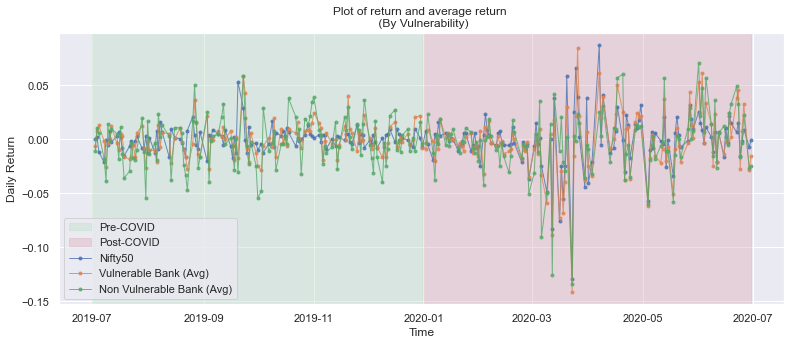

In [15]:
sns.set(rc={'figure.figsize':(13,5)})
# Start and end of the date range to extract
start, end = '2019-07-01', '2020-07-31'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.axvspan(date2num(datetime(2019,7,1)), date2num(datetime(2019,12,31)), label="Pre-COVID", color="#bddec5", alpha=0.4)
ax.axvspan(date2num(datetime(2020,1,1)), date2num(datetime(2020,6,30)), label="Post-COVID", color="#deadb8", alpha=0.4)
ax.plot(return_df2.loc[start:end, 'nifty50'], marker='.', linestyle='-', linewidth=1, label='Nifty50', alpha = 0.8)
ax.plot(return_df2.loc[start:end, 'vul_avg'], marker='.', linestyle='-', linewidth=1, label='Vulnerable Bank (Avg)', alpha = 0.8)
ax.plot(return_df2.loc[start:end, 'nonvul_avg'], marker='.', linestyle='-', linewidth=1, label='Non Vulnerable Bank (Avg)', alpha = 0.8)
ax.set_xlabel('Time')
ax.set_ylabel('Daily Return')
ax.set_title('Plot of return and average return \n (By Vulnerability)')
plt.legend()
plt.savefig('./../img/plot/return_by_vulnerability.png', dpi = 500, bbox_inches = 'tight')
plt.show()